<a href="https://colab.research.google.com/github/BenShieh233/Learn_Python/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
import matplotlib.lines as mlines
import pandas as pd   
import seaborn as sns
from random import sample

from sklearn.preprocessing import MinMaxScaler, StandardScaler # For rescaling metrics to fit 0 to 1 range
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean

In [ ]:
wine = pd.read_csv('/content/winequality-red.csv', sep=';')

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


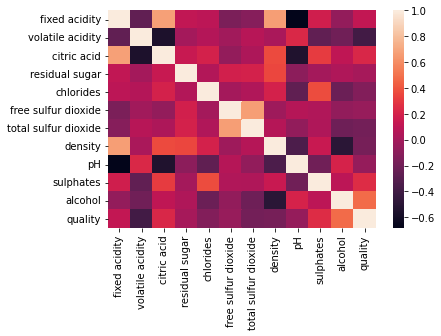

In [ ]:
# Heatmap
sns.heatmap(wine.corr());

In [ ]:
scaler = MinMaxScaler()
scaler.fit(wine)
wine_sc = scaler.transform(wine)
wine_sc

array([[0.24778761, 0.39726027, 0.        , ..., 0.13772455, 0.15384615,
        0.4       ],
       [0.28318584, 0.52054795, 0.        , ..., 0.20958084, 0.21538462,
        0.4       ],
       [0.28318584, 0.43835616, 0.04      , ..., 0.19161677, 0.21538462,
        0.4       ],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.25149701, 0.4       ,
        0.6       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.22754491, 0.27692308,
        0.4       ],
       [0.12389381, 0.13013699, 0.47      , ..., 0.19760479, 0.4       ,
        0.6       ]])

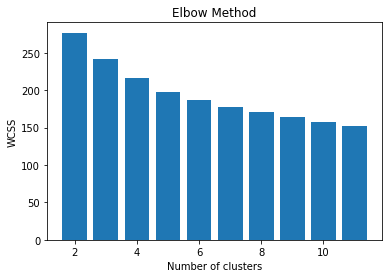

In [ ]:
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    kmeans.fit(wine_sc)
    wcss.append(kmeans.inertia_)
plt.bar(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeans.fit(wine_sc)

KMeans(max_iter=1000, n_clusters=6, random_state=0)

In [ ]:
kmeans.labels_

array([5, 5, 5, ..., 1, 1, 2], dtype=int32)

In [ ]:
wine['k_means_cl'] = kmeans.labels_
for i in range(6):
  print(wine[wine['k_means_cl'] == i]['quality'].mean())

5.321428571428571
6.052173913043478
6.484496124031008
5.280757097791798
5.747081712062257
5.200392927308448


In [ ]:
def relab(label):
  if label == 0:
    return 2
  elif label == 1:
    return 4
  elif label == 2:
    return 5
  elif label == 3:
    return 1
  elif label == 4:
    return 3
  else:
    return 0

In [ ]:
kmlab = list(map(relab, kmeans.labels_))

In [ ]:
wine['k_means_cl'] = kmlab

In [ ]:
for i in range(6):
  print(wine[wine['k_hier_cl'] == i]['quality'].mean())

6.266490765171504
5.254658385093168
5.276422764227642
5.7974683544303796
5.892156862745098
5.25


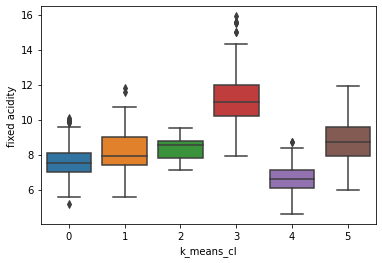

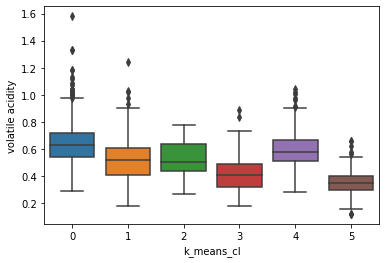

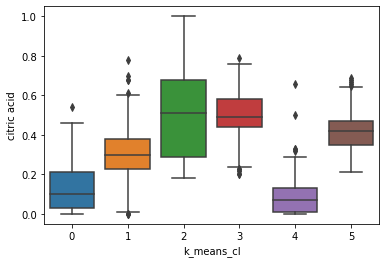

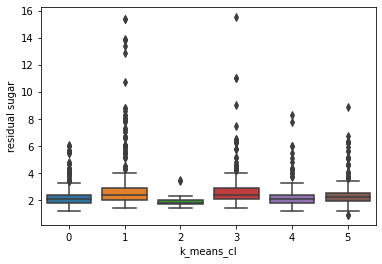

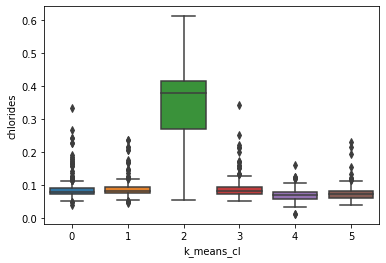

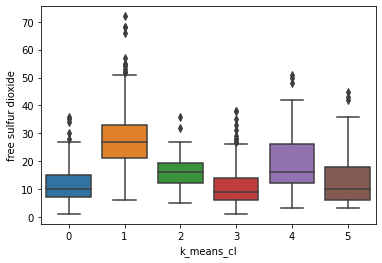

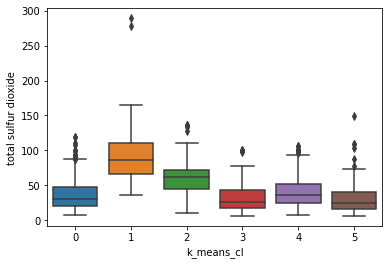

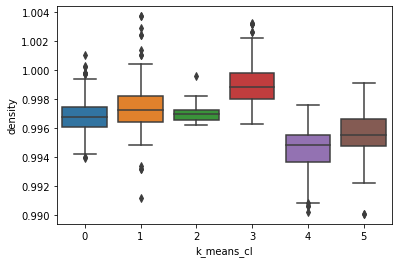

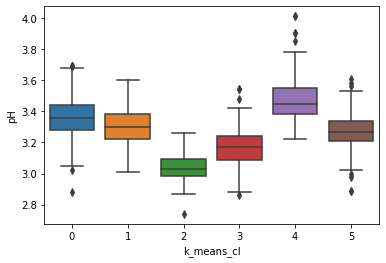

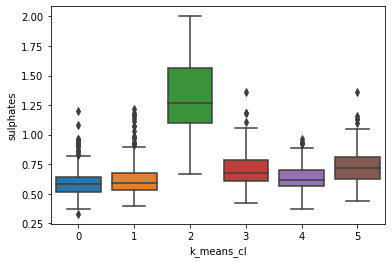

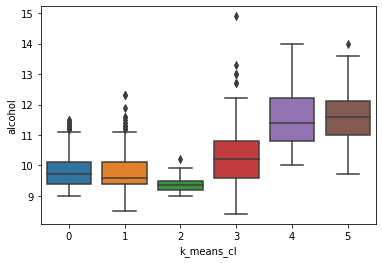

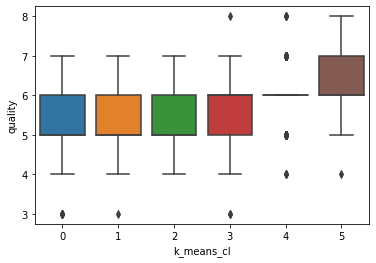

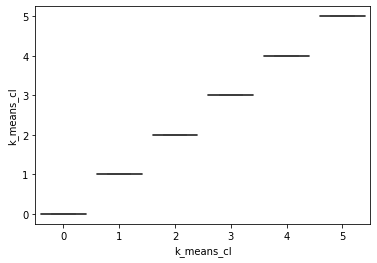

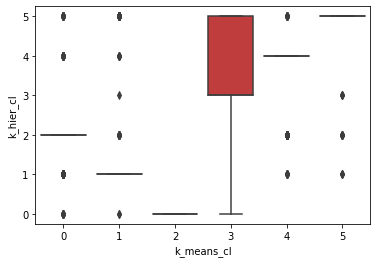

In [ ]:
for i in wine.columns:
  sns.boxplot(x = "k_means_cl", y = i, data = wine)
  plt.show()

In [ ]:
wine_sc

array([[0.24778761, 0.39726027, 0.        , ..., 0.13772455, 0.15384615,
        0.4       ],
       [0.28318584, 0.52054795, 0.        , ..., 0.20958084, 0.21538462,
        0.4       ],
       [0.28318584, 0.43835616, 0.04      , ..., 0.19161677, 0.21538462,
        0.4       ],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.25149701, 0.4       ,
        0.6       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.22754491, 0.27692308,
        0.4       ],
       [0.12389381, 0.13013699, 0.47      , ..., 0.19760479, 0.4       ,
        0.6       ]])

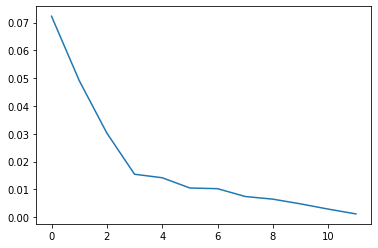

In [ ]:
# PCA
model = PCA()
results = model.fit(wine_sc)
Z = results.transform(wine_sc)
plt.plot(results.explained_variance_)
plt.show()

In [ ]:
wine_sc

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


In [ ]:
scaler = MinMaxScaler()
scaler.fit(wine)
wine_sc = scaler.transform(wine)
wine_sc

array([[0.24778761, 0.39726027, 0.        , ..., 0.13772455, 0.15384615,
        0.4       ],
       [0.28318584, 0.52054795, 0.        , ..., 0.20958084, 0.21538462,
        0.4       ],
       [0.28318584, 0.43835616, 0.04      , ..., 0.19161677, 0.21538462,
        0.4       ],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.25149701, 0.4       ,
        0.6       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.22754491, 0.27692308,
        0.4       ],
       [0.12389381, 0.13013699, 0.47      , ..., 0.19760479, 0.4       ,
        0.6       ]])

In [ ]:
wine_sc

array([[0.24778761, 0.39726027, 0.        , ..., 0.13772455, 0.15384615,
        0.4       ],
       [0.28318584, 0.52054795, 0.        , ..., 0.20958084, 0.21538462,
        0.4       ],
       [0.28318584, 0.43835616, 0.04      , ..., 0.19161677, 0.21538462,
        0.4       ],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.25149701, 0.4       ,
        0.6       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.22754491, 0.27692308,
        0.4       ],
       [0.12389381, 0.13013699, 0.47      , ..., 0.19760479, 0.4       ,
        0.6       ]])

In [ ]:
x = wine.values
wine_sc = pd.DataFrame(wine_sc)

In [ ]:
# Create PCA object.
pca = PCA(n_components=3)
#Run PCA.
pComp=pca.fit_transform(wine_sc)
wine_pca = pd.DataFrame(data = pComp
             , columns = ['PC 1', 'PC 2', 'PC 3'])
wine_pca

,PC 1,PC 2,PC 3
0,-0.308010,-0.198750,-0.157373
1,-0.265056,-0.237308,0.057130
2,-0.222379,-0.191181,-0.065895
3,0.424268,-0.057361,0.042600
4,-0.308010,-0.198750,-0.157373
...,...,...,...
1594,-0.353614,-0.020534,0.157276
1595,-0.315667,0.163685,0.297947
1596,-0.221657,0.139932,0.163725
1597,-0.356954,-0.047596,0.165719


In [ ]:
pca.components_

array([[ 0.49837736, -0.24552142,  0.66560233,  0.06628781,  0.06094957,
        -0.07112095, -0.02287452,  0.28854709, -0.31689165,  0.138499  ,
         0.01199468,  0.17781121],
       [-0.12870815, -0.21349029,  0.07486187, -0.05573728, -0.08961443,
        -0.11548359, -0.17756401, -0.39218358,  0.12712112,  0.06269692,
         0.64169868,  0.53904836],
       [-0.14462475, -0.13285519,  0.13779968,  0.14859084,  0.01111933,
         0.77988446,  0.52977891, -0.07553938,  0.01858743,  0.1047306 ,
         0.07113789,  0.09630839]])

In [ ]:
import seaborn as sns

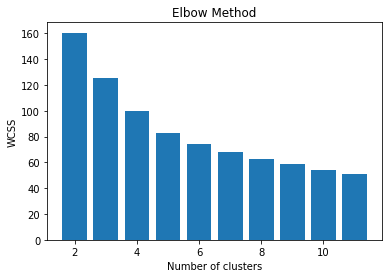

In [ ]:
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    kmeans.fit(wine_pca)
    wcss.append(kmeans.inertia_)
plt.bar(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeans.fit(wine_pca)

KMeans(max_iter=1000, n_clusters=6, random_state=0)

In [ ]:
wine_pca['k_means_cl'] = kmeans.labels_
for i in range(6):
  print(wine_pca[wine_pca['k_means_cl'] == i]['PC 3'].mean())

0.23758437091178805
0.010596619245047532
0.047327209804013545
-0.10024140885154757
-0.09105791421446424
-0.0758953259249552


In [ ]:
def relab3(label):
  if label == 0:
    return 5
  elif label == 1:
    return 3
  elif label == 2:
    return 4
  elif label == 3:
    return 0
  elif label == 4:
    return 1
  else:
    return 2

In [ ]:
kmlab = list(map(relab3, kmeans.labels_))


In [ ]:
wine_pca['k_mean_cl'] = kmlab

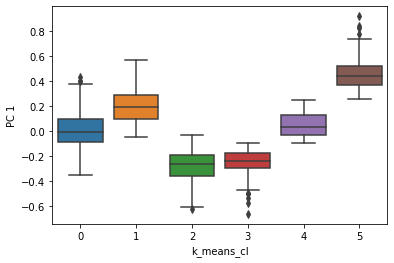

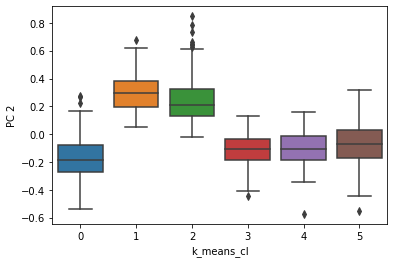

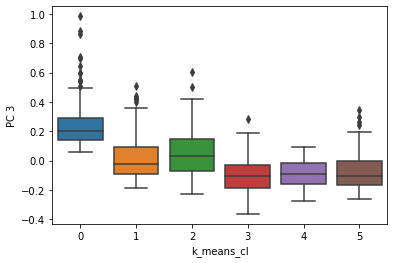

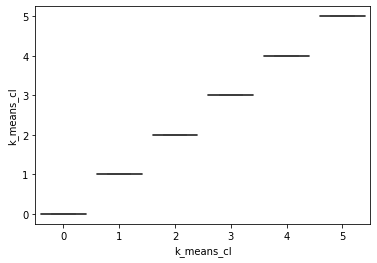

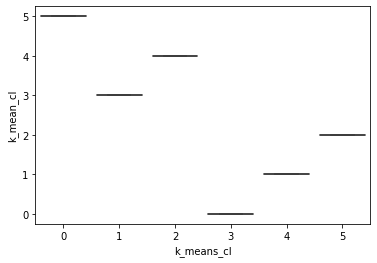

In [ ]:
for i in wine_pca.columns:
  sns.boxplot(x = "k_means_cl", y = i, data = wine_pca)
  plt.show()